In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# # Read News and DJIA Data
# df_news = pd.read_csv('/kaggle/input/financialnews/Combined_News_DJIA.csv')
# stock_data = pd.read_csv('/kaggle/input/financialnews/upload_DJIA_table.csv')
df = pd.read_csv('/kaggle/input/masterthesis-01-seniment/stock_sentiment.csv')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df

In [ ]:
# import numpy as np 
# import pandas as pd 
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# import tensorflow as tf

# def create_sequences(data, seq_len):
#     sequences = []
#     target = []
    
#     for i in range(len(data) - seq_len):
#         sequences.append(data[i:i+seq_len])
#         target.append(data[i+seq_len, 0])  # Predict the 'Adj Close' value
        
#     return np.array(sequences), np.array(target)

# def build_and_train_model(X_train, y_train, input_shape, epochs=100, learning_rate=0.02):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.LSTM(70, activation="tanh", return_sequences=True, input_shape=input_shape),
#         tf.keras.layers.LSTM(30, activation="tanh", return_sequences=True),
#         tf.keras.layers.LSTM(10, activation="tanh"),
#         tf.keras.layers.Dense(1, activation="linear")
#     ])
    
#     model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate))
    
#     # Implement early stopping
#     early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
    
#     model.fit(
#         X_train, y_train,
#         epochs=epochs,
#         callbacks=[early_stopping],  # add early stopping
#         verbose=0
#     )
#     return model

In [ ]:
# def run_scenario(data, label, split=0.85, sequence_length=10, epochs=100, learning_rate=0.02):
#     # Your previous data preprocessing and model training code
    
#     # Split data into training and testing sets
#     train_size = int(len(data) * split)
#     train_data, test_data = data[:train_size], data[train_size:]

#     # Normalize data
#     scaler = MinMaxScaler()
#     train_scaled = scaler.fit_transform(train_data)
#     test_scaled = scaler.transform(test_data)

#     # Create sequences
#     X_train, y_train = create_sequences(train_scaled, sequence_length)
#     X_test, y_test = create_sequences(test_scaled, sequence_length)

#     # Build and train model
#     model = build_and_train_model(X_train, y_train, (sequence_length, data.shape[1]), epochs, learning_rate)

#     # Make predictions
#     predictions = model.predict(X_test)
#     predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((len(predictions), data.shape[1]-1)))))[:, 0]

#     # Inverse scale y_test
#     y_test_original = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), data.shape[1]-1)))))[:, 0]

#     # Evaluate model
#     mae = mean_absolute_error(predictions, y_test_original)
#     mape = mean_absolute_percentage_error(predictions, y_test_original)
#     acc = 1 - mape

#     # Store results
#     results[label] = {"MAE": mae, "MAPE": mape, "Accuracy": acc}

# # Combine and select relevant data columns
# data_no_sentiment = stock_data[['Adj Close']].values
# data_finbert = pd.concat([stock_data['Adj Close'], news_df['FinBERT score']], axis=1).values
# data_vader = pd.concat([stock_data['Adj Close'], news_df['VADER score']], axis=1).values

# # Store results
# results = {}

# # Run scenarios
# run_scenario(data_no_sentiment, "No Sentiment")
# run_scenario(data_finbert, "FinBERT Sentiment")
# run_scenario(data_vader, "VADER Sentiment")

# # Display results
# for scenario, metrics in results.items():
#     print(f"\n{scenario}:")
#     for metric, value in metrics.items():
#         print(f"{metric} = {value}")

In [ ]:
# import os
# import random
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from bayes_opt import BayesianOptimization
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
# import math

# def set_seeds(seed_value=42):
#     """Set seeds for reproducibility."""
#     np.random.seed(seed_value)
#     tf.random.set_seed(seed_value)
#     random.seed(seed_value)

# def create_sequences(data, seq_len):
#     """Create sequences and targets for LSTM training."""
#     sequences = []
#     target = []
#     for i in range(len(data) - seq_len):
#         sequences.append(data[i:i+seq_len])
#         target.append(data[i+seq_len, 0])
#     return np.array(sequences), np.array(target)

# def build_and_train_model(X_train, y_train, input_shape, epochs, learning_rate):
#     """
#     Build and train the LSTM model.

#     Parameters:
#     - X_train (np.array): Training data.
#     - y_train (np.array): Training labels.
#     - input_shape (tuple): Shape of input data.
#     - epochs (int): Number of epochs.
#     - learning_rate (float): Learning rate.
#     - use_bayesian_optimization (bool): Whether to use Bayesian Optimization.
#     - bayes_optimizer (BayesianOptimization object): Bayesian Optimization object for hyperparameter tuning.

#     Returns:
#     - model (tf.keras.Model): Trained LSTM model.
#     """
    
#     model = tf.keras.models.Sequential(
#         [
#             tf.keras.layers.LSTM(units = 140, activation = "tanh", return_sequences = True, input_shape=input_shape),
#             tf.keras.layers.Dropout(0.15),
#             tf.keras.layers.LSTM(units = 60, activation = "tanh", return_sequences = True),
#             tf.keras.layers.Dropout(0.05),
#             tf.keras.layers.LSTM(units = 20, activation = "tanh", return_sequences = False),
#             tf.keras.layers.Dropout(0.01),
#             tf.keras.layers.Dense(units = 1, activation = "linear")
#         ]
#     )

#     model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate))
    
#     early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
#     model.fit(X_train, y_train, epochs=epochs, validation_split=0.1, callbacks=[early_stopping], verbose=0)
    
#     return model

# def optimize_hyperparameters(X_train, y_train, input_shape, X_val, y_val, scaler):
#     def train_model_and_get_accuracy(learning_rate, epochs):
#         learning_rate = 10**(-learning_rate)
#         epochs = int(epochs)
#         model = build_and_train_model(X_train, y_train, input_shape, epochs, learning_rate)
#         predictions = model.predict(X_val)
#         predictions = scaler.inverse_transform(predictions)[:, 0]
#         y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1))[:, 0]
#         mape = mean_absolute_percentage_error(y_val_original, predictions)
#         acc = 1 - mape
#         return acc
    
#     optimizer = BayesianOptimization(
#         f=train_model_and_get_accuracy, 
#         pbounds={"learning_rate": (1, 5), "epochs": (10, 150)}, 
#         random_state=42, 
#         verbose=2
#     )
#     optimizer.maximize(init_points=5, n_iter=15)
#     best_params = optimizer.max['params']
#     best_params['learning_rate'] = 10**(-best_params['learning_rate'])
#     best_params['epochs'] = int(best_params['epochs'])
#     return best_params

# def get_timeframe(data):
#     """
#     Get the minimum and maximum dates from the data.

#     Parameters:
#     - data (np.array): Time series data with date in the first column.

#     Returns:
#     - (str, str): Minimum and maximum date as strings.
#     """
#     min_date = pd.to_datetime(np.min(data[:, 0])).strftime('%Y-%m-%d')
#     max_date = pd.to_datetime(np.max(data[:, 0])).strftime('%Y-%m-%d')
#     return min_date, max_date

# def run_scenario(data, label, split=0.85, sequence_length=10, use_bayesian_optimization=True):
#     results = {}
#     train_size = int(len(data) * split)
#     train_data, test_data = data[:train_size], data[train_size:]
    
#     # Get and print timeframes
#     train_min_date, train_max_date = get_timeframe(train_data)
#     test_min_date, test_max_date = get_timeframe(test_data)
#     print(f"Training data covers from {train_min_date} to {train_max_date}")
#     print(f"Test data covers from {test_min_date} to {test_max_date}")

#     # Separate date and numeric data
#     train_dates, train_data_numeric = train_data[:, 0], train_data[:, 1:].astype(float)
#     test_dates, test_data_numeric = test_data[:, 0], test_data[:, 1:].astype(float)
    
#     # Scale data
#     scaler = MinMaxScaler()
#     train_scaled_numeric = scaler.fit_transform(train_data_numeric)
#     test_scaled_numeric = scaler.transform(test_data_numeric)
    
#     # Additional scaler for 'Close' prices only
#     close_scaler = MinMaxScaler()
#     close_scaler.fit(train_data_numeric[:, 1].reshape(-1, 1))  # Assuming 'Close' is the second column in train_data_numeric
    
#     # Splitting training data into training and validation sets
#     val_size = int(len(train_scaled_numeric) * 0.2)
#     val_scaled_numeric, train_scaled_numeric = train_scaled_numeric[-val_size:], train_scaled_numeric[:-val_size]
#     val_dates, train_dates = train_dates[-val_size:], train_dates[:-val_size]
    
#     # Get and print timeframe for validation data
#     val_min_date, val_max_date = get_timeframe(train_data[-val_size:])
#     print(f"Validation data covers from {val_min_date} to {val_max_date}")
    
#     # Creating sequences
#     X_train, y_train = create_sequences(train_scaled_numeric, sequence_length)
#     X_val, y_val = create_sequences(val_scaled_numeric, sequence_length)
#     X_test, y_test = create_sequences(test_scaled_numeric, sequence_length)
    
#     # Hyperparameter optimization and model training
#     if use_bayesian_optimization:
#         best_params = optimize_hyperparameters(X_train, y_train, (sequence_length, train_data_numeric.shape[1]), X_val, y_val, close_scaler)
#         model = build_and_train_model(X_train, y_train, (sequence_length, train_data_numeric.shape[1]), best_params['epochs'], best_params['learning_rate'])
#     else:
#         # Using default or predetermined hyperparameters for training
#         model = build_and_train_model(X_train, y_train, (sequence_length, train_data_numeric.shape[1]), 50, 0.001)  # Example values for epochs and learning_rate
    
#     # Model evaluation
#     model.save(os.path.join("saved_models", f"{label}.h5"))
    
#     predictions = model.predict(X_test)
#     predictions_original = close_scaler.inverse_transform(predictions)
#     y_test_original = close_scaler.inverse_transform(y_test.reshape(-1, 1))
    
#     mae = mean_absolute_error(y_test_original, predictions_original)
#     mape = mean_absolute_percentage_error(y_test_original, predictions_original)
#     acc = 1 - mape
#     rmse = math.sqrt(mean_squared_error(y_test_original, predictions_original))
#     r2 = r2_score(y_test_original, predictions_original)
    
#     results[label] = {
#         "MAE": mae, 
#         "MAPE": mape, 
#         "Accuracy": acc,
#         "RMSE": rmse,  # Added line
#         "R2 Score": r2,  # Added line
#         "Best Parameters": best_params if use_bayesian_optimization else None
#     }
    
#     # Creating a DataFrame for predictions
#     predictions_df = pd.DataFrame({
#         'Date': test_dates[sequence_length:],
#         'Close': y_test_original.flatten(),
#         f'{label}_predicted': predictions_original.flatten()
#     })
    
#     return results, predictions_df


# os.makedirs("saved_models", exist_ok=True)

# set_seeds(42)

In [ ]:
# # Ensure date is in datetime format
# df['date'] = pd.to_datetime(df['date'])

# # Scenario 1: No Sentiment
# data_no_sentiment = df[['date', 'Open', 'Close', 'High', 'Low', 'Volume']].values
# results_no_sentiment, predictions_no_sentiment = run_scenario(data_no_sentiment, "No_Sentiment", use_bayesian_optimization=True)

# # Scenario 2: With FinBERT Score
# data_finbert = df[['date', 'Open', 'Close', 'High', 'Low', 'Volume', 'finbert_score']].values
# results_finbert, predictions_finbert = run_scenario(data_finbert, "FinBERT_Sentiment", use_bayesian_optimization=True)

# # Scenario 3: With VADER Score
# data_vader = df[['date', 'Open', 'Close', 'High', 'Low', 'Volume', 'vader_score']].values
# results_vader, predictions_vader = run_scenario(data_vader, "VADER_Sentiment", use_bayesian_optimization=True)


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import math

os.environ['TF_DETERMINISTIC_OPS'] = '1'

def set_seeds(seed_value=42):
    """Set seeds for reproducibility."""
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    random.seed(seed_value)

def create_sequences(data, seq_len):
    """Create sequences and targets for LSTM training."""
    sequences = []
    target = []
    for i in range(len(data) - seq_len):
        sequences.append(data[i:i+seq_len])
        target.append(data[i+seq_len, 0])
    return np.array(sequences), np.array(target)

def build_and_train_model(X_train, y_train, input_shape, epochs, learning_rate):
    """
    Build and train the LSTM model.

    Parameters:
    - X_train (np.array): Training data.
    - y_train (np.array): Training labels.
    - input_shape (tuple): Shape of input data.
    - epochs (int): Number of epochs.
    - learning_rate (float): Learning rate.
    - use_bayesian_optimization (bool): Whether to use Bayesian Optimization.
    - bayes_optimizer (BayesianOptimization object): Bayesian Optimization object for hyperparameter tuning.

    Returns:
    - model (tf.keras.Model): Trained LSTM model.
    """
    set_seeds(42)
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.LSTM(units = 100, activation = "tanh", return_sequences = True, input_shape=input_shape),
            tf.keras.layers.Dropout(0.03),
            tf.keras.layers.LSTM(units = 60, activation = "tanh", return_sequences = False),
            tf.keras.layers.Dropout(0.03),
            tf.keras.layers.Dense(units=25, activation="linear"),
            tf.keras.layers.Dense(units = 1, activation = "linear")
        ]
    )

    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate))
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    model.fit(X_train, y_train, epochs=epochs, validation_split=0.1, callbacks=[early_stopping], verbose=0, shuffle=True)
    
    return model

def optimize_hyperparameters(X_train, y_train, input_shape, X_val, y_val, scaler):
    def train_model_and_get_accuracy(learning_rate, epochs):
        learning_rate = 10**(-learning_rate)
        epochs = int(epochs)
        model = build_and_train_model(X_train, y_train, input_shape, epochs, learning_rate)
        predictions = model.predict(X_val)
        predictions = scaler.inverse_transform(predictions)[:, 0]
        y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1))[:, 0]
        mape = mean_absolute_percentage_error(y_val_original, predictions)
        acc = 1 - mape
        return acc
    
    optimizer = BayesianOptimization(
        f=train_model_and_get_accuracy, 
        pbounds={"learning_rate": (1, 5), "epochs": (10, 150)}, 
        random_state=42, 
        verbose=2
    )
    optimizer.maximize(init_points=5, n_iter=15)
    best_params = optimizer.max['params']
    best_params['learning_rate'] = 10**(-best_params['learning_rate'])
    best_params['epochs'] = int(best_params['epochs'])
    return best_params

def get_timeframe(data):
    """
    Get the minimum and maximum dates from the data.

    Parameters:
    - data (np.array): Time series data with date in the first column.

    Returns:
    - (str, str): Minimum and maximum date as strings.
    """
    min_date = pd.to_datetime(np.min(data[:, 0])).strftime('%Y-%m-%d')
    max_date = pd.to_datetime(np.max(data[:, 0])).strftime('%Y-%m-%d')
    return min_date, max_date

def run_scenario(data, label, split=0.85, sequence_length=30, use_bayesian_optimization=True):
    results = {}
    train_size = int(len(data) * split)
    train_data, test_data = data[:train_size], data[train_size:]
    
    # Get and print timeframes
    train_min_date, train_max_date = get_timeframe(train_data)
    test_min_date, test_max_date = get_timeframe(test_data)
    print(f"Training data covers from {train_min_date} to {train_max_date}. Size: {len(train_data)}")
    print(f"Test data covers from {test_min_date} to {test_max_date}. Size: {len(test_data)}")

    # Separate date and numeric data
    train_dates, train_data_numeric = train_data[:, 0], train_data[:, 1:].astype(float)
    test_dates, test_data_numeric = test_data[:, 0], test_data[:, 1:].astype(float)
    
    # Scale data
    scaler = MinMaxScaler()
    train_scaled_numeric = scaler.fit_transform(train_data_numeric)
    test_scaled_numeric = scaler.transform(test_data_numeric)
    
    # Additional scaler for 'Close' prices only
    close_scaler = MinMaxScaler()
    close_scaler.fit(train_data_numeric[:, 0].reshape(-1, 1))  # Assuming 'Close' is the first column in train_data_numeric
    
    # Splitting training data into training and validation sets
    val_size = int(len(train_scaled_numeric) * 0.2)
    val_scaled_numeric, train_scaled_numeric = train_scaled_numeric[-val_size:], train_scaled_numeric[:-val_size]
    val_dates, train_dates = train_dates[-val_size:], train_dates[:-val_size]
    
    # Get and print timeframe for validation data
    val_min_date, val_max_date = get_timeframe(train_data[-val_size:])
    print(f"Validation data covers from {val_min_date} to {val_max_date}. Size: {val_size}")
    
    # Creating sequences
    X_train, y_train = create_sequences(train_scaled_numeric, sequence_length)
    X_val, y_val = create_sequences(val_scaled_numeric, sequence_length)
    X_test, y_test = create_sequences(test_scaled_numeric, sequence_length)
    
    # Hyperparameter optimization and model training
    if use_bayesian_optimization:
        best_params = optimize_hyperparameters(X_train, y_train, (sequence_length, train_data_numeric.shape[1]), X_val, y_val, close_scaler)
        model = build_and_train_model(X_train, y_train, (sequence_length, train_data_numeric.shape[1]), best_params['epochs'], best_params['learning_rate'])
    else:
        # Using default or predetermined hyperparameters for training
        model = build_and_train_model(X_train, y_train, (sequence_length, train_data_numeric.shape[1]), 50, 0.001)  # Example values for epochs and learning_rate
    
    # Model evaluation
    model.save(os.path.join("saved_models", f"{label}.h5"))
    
    predictions = model.predict(X_test)
    predictions_original = close_scaler.inverse_transform(predictions)
    y_test_original = close_scaler.inverse_transform(y_test.reshape(-1, 1))
    
    mae = mean_absolute_error(y_test_original, predictions_original)
    mape = mean_absolute_percentage_error(y_test_original, predictions_original)
    acc = 1 - mape
    rmse = math.sqrt(mean_squared_error(y_test_original, predictions_original))
    r2 = r2_score(y_test_original, predictions_original)
    
    results[label] = {
        "MAE": mae, 
        "MAPE": mape, 
        "Accuracy": acc,
        "RMSE": rmse,  # Added line
        "R2 Score": r2,  # Added line
        "Best Parameters": best_params if use_bayesian_optimization else None
    }
    
    # Creating a DataFrame for predictions
    predictions_df = pd.DataFrame({
        'Date': test_dates[sequence_length:],
        'Close': y_test_original.flatten(),
        f'{label}_predicted': predictions_original.flatten()
    })
    
    return results, predictions_df


os.makedirs("saved_models", exist_ok=True)

set_seeds(42)

In [ ]:
# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'])


# Scenario 1: Close + FinBERT Score
data_finbert = df[['date', 'Close', 'finbert_score']].values
results_finbert, predictions_finbert = run_scenario(data_finbert, "FinBERT_Sentiment", sequence_length=1, use_bayesian_optimization=True)

# Scenario 2: Close + VADER Score
data_vader = df[['date', 'Close', 'vader_score']].values
results_vader, predictions_vader = run_scenario(data_vader, "VADER_Sentiment", sequence_length=1, use_bayesian_optimization=True)

In [ ]:
# Combine and Display Results
results = {
    **results_finbert, 
    **results_vader}

predictions = predictions_finbert.merge(predictions_vader[['Date', 'VADER_Sentiment_predicted']], on='Date')

In [ ]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Save the results DataFrame to a CSV file
results_df.to_csv('results.csv')
predictions.to_csv('predictions.csv')

In [ ]:
results_df

**Fining best Sequence Length**

1

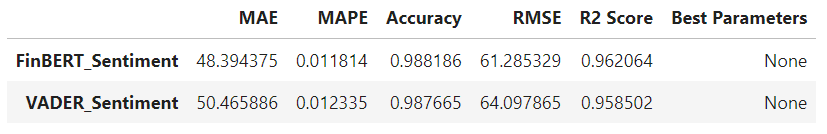

2

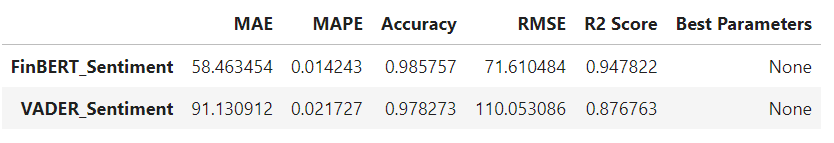

3

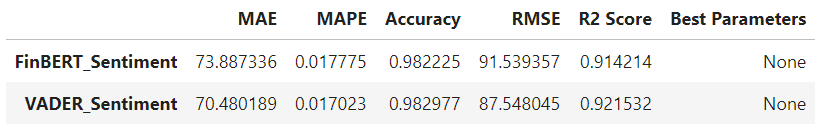

4

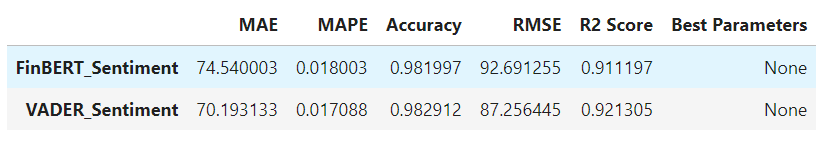

5

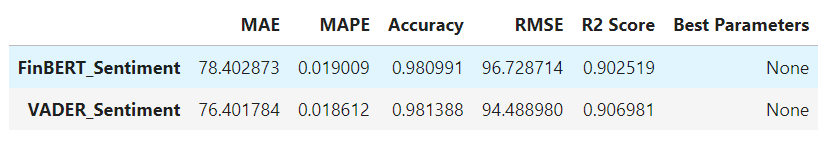

In [ ]:
# import numpy as np 
# import pandas as pd 
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_percentage_error
# import tensorflow as tf

# # hyperparameters
# split = (0.85);
# sequence_length = 10;
# epochs = 100
# learning_rate = 0.02



# # loading stock price and news data
# stock_data = pd.read_csv("/kaggle/input/financialnews/upload_DJIA_table.csv")
# news_data = pd.read_csv("/kaggle/working/sentiment.csv")
# stock_column = ['Adj Close']
# news_column = ['VADER score']


# len_stock_data = stock_data.shape[0]


# # splitting data to train and test
# train_examples = int(len_stock_data * split)
# train = stock_data.get(stock_column).values[:train_examples]
# train_sentiment = news_data.get(news_column).values[:train_examples]
# test = stock_data.get(stock_column).values[train_examples:]
# test_sentiment = news_data.get(news_column).values[train_examples:]
# len_train = train.shape[0]
# len_test = test.shape[0]
# len_train_sentiment = train_sentiment.shape[0]
# len_test_sentiment = test_sentiment.shape[0]


# # normalizing data
# scaler = MinMaxScaler()
# train, test = scaler.fit_transform(train), scaler.fit_transform(test)


# # splitting training data to x and y
# X_train = []
# for i in range(len_train - sequence_length):
#     X_train.append(train[i : i + sequence_length])
# len_X_train = len(X_train)
# y_train = np.array(train[sequence_length:]).astype(float)


# # splitting testing data to x and y
# X_test = []
# for i in range(len_test - sequence_length):
#     X_test.append(test[i : i + sequence_length])
# len_X_test = len(X_test)
# y_test = np.array(test[sequence_length:]).astype(float)


# # adding news sentiment to train and test
# for i in range(len_X_train):
#     X_train[i] = X_train[i].tolist()
#     X_train[i].append(train_sentiment[sequence_length + i].tolist())
# X_train = np.array(X_train).astype(float)

# for i in range(len_X_test):
#     X_test[i] = X_test[i].tolist()
#     X_test[i].append(test_sentiment[sequence_length + i].tolist())
# X_test = np.array(X_test).astype(float)


# #creating LSTM model
# def model_create():
#     tf.random.set_seed(1234)
#     model = tf.keras.models.Sequential(
#         [
#             tf.keras.Input(shape = (X_train.shape[1], 1)),
#             tf.keras.layers.LSTM(units = 70, activation = "tanh", return_sequences = True),
#             tf.keras.layers.LSTM(units = 30, activation = "tanh", return_sequences = True),
#             tf.keras.layers.LSTM(units = 10, activation = "tanh", return_sequences = False),
#             tf.keras.layers.Dense(units = 1, activation = "linear")
#         ]
#     )

#     model.compile(
#         loss = tf.keras.losses.mean_squared_error,
#         optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
#     )

#     model.fit(
#         X_train, y_train,
#         epochs = epochs
#     )
#     return model


# # inverting normaliztion
# y_test = scaler.inverse_transform(y_test)



# # prediction on test set
# def predict(model):
#     predictions = model.predict(X_test)
#     predictions = scaler.inverse_transform(predictions.reshape(-1,1)).reshape(-1,1)
#     return predictions




# # evaluation
# def evaluate(predictions):
#     mae = mean_absolute_error(predictions, y_test)
#     mape = mean_absolute_percentage_error(predictions, y_test)
#     return mae, mape, (1 - mape)


# # trial runs
# def run_model(n):
#     total_mae = total_mape = total_acc = 0
#     for i in range(n):
#         model = model_create()
#         predictions = predict(model)
#         mae, mape, acc = evaluate(predictions)
#         total_mae += mae
#         total_mape += mape 
#         total_acc += acc 
#     return (total_mae / n), (total_mape / n), (total_acc / n)


# mae, mape, acc = run_model(1)

# print(f"Mean Absolute Error = {mae}")
# print(f"Mean Absolute Percentage Error = {mape}%")
# print(f"Accuracy = {acc}")

FinBert
- Mean Absolute Error = 164.18811497631927
- Mean Absolute Percentage Error = 0.018404834389613788%
- Accuracy = 0.9815951656103862

VADER
- Mean Absolute Error = 152.3828716275952
- Mean Absolute Percentage Error = 0.017230813411148894%
- Accuracy = 0.9827691865888512

LSTM
- Mean Absolute Error = 158.84918020772062
- Mean Absolute Percentage Error = 0.01793745272032302%
- Accuracy = 0.982062547279677